# Problems Notebook

<p>Computer Infrastructure </p>   <p>Author: Gerry Callaghan</p>

In [1]:
# External libraries or packages I use in this project

# dates and times - among other things, I use this package to format dates into strings for that i can append to filenames.
import datetime as dt

# data frames - I use pandas to handle tabular data imported from yFinance's csv file.
import pandas as pd

# need numpy to create two arrays for charts
import numpy as np

# plot graphs - I use matplotlib to plot graphs of the stocks.
import matplotlib.pyplot as plt 

# Yahoo Finance is not part of the cental python repository but is an open-source package available that can be installed via conda-forge.
# This open-source library that provides a reliable, threaded, and pythonic way to download historical market data from Yahoo! Finance.
import yfinance as yf
# I had issues with older versions of yfinance, so I want to confirm the version I'm using. This will also help with debugging if I encounter any issues.
# print(yf.__version__)

# There are known issues with yfinance and the default user-agent, so i need to spoof my user-agent
# You can read more about this issue here: https://www.reddit.com/r/learnpython/comments/1kc3miq/yfinance_error_yfratelimiterrortoo_many_requests/
# Details on how requests from the curl_cffi package can be imported can be found here: https://pypi.org/project/curl-cffi/
import curl_cffi.requests as requests
# this will tell Yahoo Finance that my useragent string is a Chrome Browser because apparently this browser was more dependable for access Yahoo Finance
session = requests.Session(impersonate="chrome")

# this is needed to handle file paths
import os

# to read in csv files
import csv 


#####  User-Defined Variables
I could have requested the user input these via an input() function, but there is perhaps too much room for typos on behalf of user, 
so I'm declaring the values for the variables but showing how a user might change them here and pass their value to the function.

In [2]:
# From URL= "https://algotrading101.com/learn/yfinance-guide/" 5 days is written as '5d' within the download() function, 
# while I want hourly data, so I set interval='1h' for 1 hour intervals. So, I will pass these values to my function.

# I'm specifying my script to collate information over the last five days, I could have chosen 1d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,
days_of_data = "5d"

# I'm specifying my script to collate hourly prices, I could have chosen 1m,2m,5m,15m,30m,60m,90m,1d,5d,1wk,1mo,3mo
frequency_of_prices="1h"

# My portfolio of stocks I want to download data is as follows:
stock_tickers = ['AAPL', 'AMZN','GOOG', 'META','NFLX']  # Here I am specifying the FAANG stocks to be downloaded
# **************************************************************************************



# Problem 1: Data from yfinance

In [3]:
def get_data():
   """A function to download historical stock data from Yahoo Finance using yfinance package,
    and then export the data to a CSV file in the data directory named with the current date and time for uniqueness."""
   
    # I will use the yfinance download() function for this purpose.
    # Details of this function can be found here https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html
    # it says the format of the command is as follows:
    # yfinance.download(tickers, start=None, end=None, actions=False, threads=True, ignore_tz=None, group_by='column', auto_adjust=None, 
    # back_adjust=False, repair=False, keepna=False, progress=True, period=None, interval='1d', prepost=False, proxy=<object object>, 
    # rounding=False, timeout=10, session=None, multi_level_index=True) 

    # I download the data from yahoo finance into a dataframe as follows, specifying a period (5 days) at a particular intervals (1 hour )
    # I have passed my stock tickers to the function, along with the period of 5 days, and my interval of hourly data 

   df = yf.download(stock_tickers, period=days_of_data, interval=frequency_of_prices, session=session)

   # Just to view the dataframe to ensure that the data looks correct in terms of there are no null values
   #print(f"{df}")

   # I now print our dataframe out to a CSV file
   # I will use the to_csv funtion, you can read about it here https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

   # Before I export it out, I want to give our csv file a name based on today's date
   # I assign a new variable "now"" equal to the current date and time
   now = dt.datetime.now()

   # I format the date and time of "now" according to a manner I want which is YYYYMMDD-HHMMSS
   # more on this can be found here docs.python.org/3/library/datetime.html#format-codes 
   # and docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
   #print(now.strftime("%Y%m%d-%H%M%S"))
   
   # I'm assigning my variable FILENAME the value of the now variable which is now in the date and time format I want plus the .csv suffix.
   FILENAME = now.strftime('%Y%m%d-%H%M%S')+'.csv'

   # I want to put the csv in a separate folder called data in the parent directory, but because I'm running this from inside the assignment folder,
   # I must go up a level first, I do this by prefixing data with ../
   DATADIR = "../data/"
   
   # the directory and filename concatenated is assigned to the variable, fullpath
   FULLPATH = DATADIR + FILENAME  

   # now to print out to this csv
   print(f"Please visit the data folder to view the csv file.\n {df.to_csv(FULLPATH)}")
   

In [4]:
# I'm going to call my function to download the data and export to csv
get_data()


/tmp/ipykernel_56222/1651842671.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_tickers, period=days_of_data, interval=frequency_of_prices, session=session)
[*********************100%***********************]  5 of 5 completed

Please visit the data folder to view the csv file.
 None


## Problem 2: Plotting the closing prices.

In [5]:
def plot_data():
    """A function to read in the latest csv file from the data directory into a pandas dataframe with multi-level columns,
    and then plot the closing prices for each of the five stocks."""
    
    # For convenience, I want to assign a variable the path and filename so i can reference it below.

    # Because I'm running this from inside the assignment folder, to access the data folder I must go up a level first, I do this by prefixing data with ../
    DATADIR = "../data/"

    # listing files in the data folder
    data_files = os.listdir(DATADIR)

    # I now sort the list of files in chronological order, latest being first in the list
    data_files.sort(reverse=True)

    # the latest file will now be the first in the sorted list, so array position 0
    FILENAME = data_files[0]

    # the directory and filename concatenated is then the fullpath
    FULLPATH = DATADIR + FILENAME  

    # When reading in the csv file with multi-level columns, I need to specify header=[0,1] 
    # to indicate that the first two rows are headers (Close, Open, etc on first row and then stock tickers on the second line)
    # I also want to specify index_col=0 to indicate that the first column is the index (dates)
    # more on this can be found here: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
    df= pd.read_csv(FULLPATH, header=[0,1], index_col=0, parse_dates=True)

    # show the first few rows of the dataframe
    #print(f"{df.head()}")
      
    # I want to confirm that the date column is the index of the dataframe
    # and more importantly that it is in datetime format. 
    # It should be because when inporting the CSV file to the dataframe, I specified parse_dates=True
    #print(f"{df.index}")

    # Create new figure and axis objects
    fig, ax = plt.subplots()

    # As covered in lecture 28-all-closing-plots.mkv, I can plot multiple columns of a dataframe directly
    # The first set of square brackets after the dataframe name indicates I am selecting columns
    # The second set of square brackets indicates I am passing in "a list" of the column names I want to plot
    # I could do it like this:
    # df[[("Apple"), ("Amazon"), ("Google"), ("Meta"), ("Netflix")]].plot()                                                          

    # but to avoid hardcoding the column names, I will use the word "Close" 
    # and Pandas will show the list of column names containing that word
    df['Close'].plot(ax=ax)

    # I want to assign names to be x and y axis
    plt.xlabel("Date",rotation=10)
    plt.ylabel("Stock Price (USD)")

    # I want to add the current date and time to the title of my plot, similar to what i did for naming my csv file above
    #I'm assigning the variable now the value of the datetime formatted value of now.
    now = dt.datetime.now()

    # I can now include the current time and date in my title as follows:
    title = "Stock Prices of the Fang Stocks" + str({now.strftime('%Y-%m-%d at %H:%M:%S')})
    plt.title(title)

    # I wanted to format the legend to be outside the plot area on the right hand side, 
    # but when i did that, part of the legend was being cut off when I saved the figure as a png file.
    # So, I decided to place the legend inside the plot area at the top right corner using bbox_to_anchor.
    # More on this can be found here - https://matplotlib.org/stable/api/legend_api.html
    plt.legend(ncol=1,loc='center left', bbox_to_anchor=(0.75, 0.75),fontsize=10, frameon=True, edgecolor='black', facecolor='lightgray',columnspacing=1.5)

    #plt.show()

    # The ../ means I go up one level from the current directory so I can then go into the plots directory
    directory_path = "../plots"

    # from Gemini AI, I will create the directory if it doesn't exist
    try:
        os.mkdir(directory_path) # makes a new directory in the chosen path
        print(f"Directory '{directory_path}' created successfully one level up.") # confirms a new directory was made
    except FileExistsError:
        print(f"Directory '{directory_path}' already exists.") # confirms a directory by that name preexists
    except OSError as e:
        print(f"Error creating directory: {e}") # outputs a message saying it was unable to create a directory

    # For convenience, I want to assign a variable called filename a value equal to the concatenation of the path and filename so i can reference it below
    filename = (directory_path) + "/" + now.strftime('%Y%m%d-%H%M%S') + "_stock_prices_of_the_fangs_stocks" + ".png"

    # Just to confirm the path and filename look okay when concatenated
    # print(f"{filename}")

    # Now to save the chart to that file. 
    # More on savefig function can be found here https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html 
    # Previously I had used plt.savefig(filename) but it was showing a blank plot, so I changed to fig.savefig(filename)
    # I created the figure and axis objects using fig, ax = plt.subplots() above to allow me to use fig.savefig() here.

    # Also, according to https://stackoverflow.com/questions/39870642/how-to-plot-a-higher-resolution-graph,
    # it is recommended to use a dpi of 300 for high resolution images 
    fig.savefig(filename, dpi=300)


Directory '../plots' already exists.


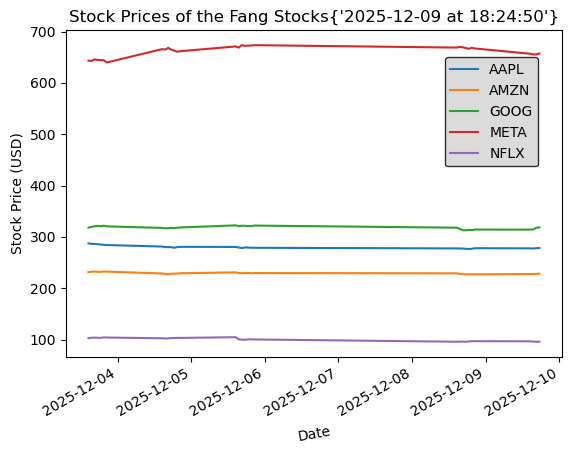

In [6]:
# I'm going to call my function to import the data from the latest csv and saves the plots to a plots folder
plot_data() 

# Problem 3: Script

In the root of my repository, I created a python script called faang.py that comprises of the two functions above, get_data() and plot_data(). To make this file executible in github, I needed the script to be marked executible. I did this by runnning "change mode to executible" as follows "chmod u+x faang.py"

I needed to add a shebang line #!/usr/bin/env -S python3 at the start of the script to tell the system how to run the file. The shebang "#!" distinguishes it from a standard comment. The "/usr/bin/env python3 " avoids hard-coding an absolute path to any specific Python 3 interpreter. 

This then allows the script to be run by typing in ./faang.py, where ./ tells the system to look in the current folder for the file faang.py. 

Finally, one thing that I needed to do differently in this script faang.py was to change the paths of my folders. For instance, in my functions above, I specified that both my data and plots folders were not inside my assignment but at the same level, so to access them I needed to go up a level using the ../ prefix. However, when executing the script from Github, the program runs from the root of the directory, so this prefix needed to be removed.

# Problem 4: Automation

A Github Action workflow was created by adding a yaml (yet another mark-down language) file in the Github folder .github/workflows. Initially I copied the example yaml given by Github, this can be found ([here](https://docs.github.com/en/actions/get-started/quickstart)). Then, I customized the yaml file to my requirements, aside from changing its name to something more meaningful. 

For instance, it was defaulted to on, I needed to change this to workflow-dispatch so I could automate it. Also, I needed to specify when to run, and this was done by updating the cron value to say "15 11 * * 6". CRON has 5 possible values, the first value signifies the minute, the second value the hour, the third the date of the month, the fourth is the month, and the fifth is the weekday where Monday is the value 1. In my case "15 11 * * 6", this means 15 minutes, 11 hours, any date of the month, any month of the year, and on the sixth day of the week. This gives me an automated time of 11:15 a.m. every Saturday. I also needed to give it the name of the script file faang.py and its relative location in github.


# end